# COMP 9517 Lab2

Written by: Borong Xu 

Environment:
- Python 3.11   
- opencv-python 4.10  
- matplotlib 3.9  
- numpy 2.1  
- scikit-image 0.25


### Library import

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
Path = 'COMP9517_25T1_Lab2_Images'

## Task1

### Preprocessing

(1290, 2796)
(1290, 2796)


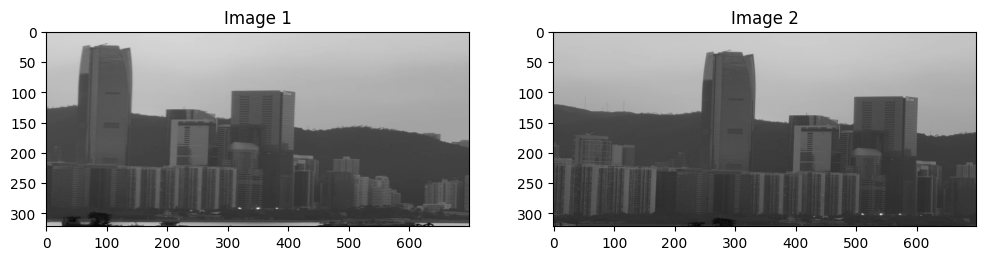

In [2]:
img1 = cv.imread(f'{Path}/img1.PNG', cv.IMREAD_GRAYSCALE)
img2 = cv.imread(f'{Path}/img2.PNG', cv.IMREAD_GRAYSCALE)


img1_size = img1.shape
img2_size = img2.shape
print(img1_size)
print(img2_size)

img1 = img1[:1200,300:1900]
img2 = img2[:1200,300:1900]

scale_percent = 0.25
img1 = cv.resize(img1, (int(img1_size[1] * scale_percent), int(img1_size[0] * scale_percent)), interpolation=cv.INTER_AREA)
img2 = cv.resize(img2, (int(img2_size[1] * scale_percent), int(img2_size[0] * scale_percent)), interpolation=cv.INTER_AREA)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Image 1')
axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Image 2')
plt.show()

### Task1.1 SIFT feature computation

123
121


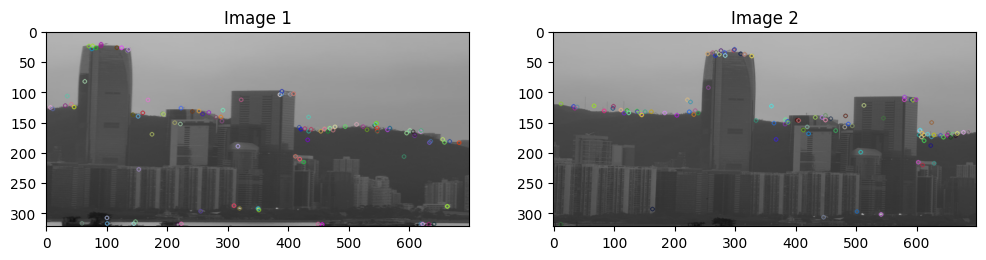

In [3]:
sift = cv.SIFT_create()
kp = sift.detect(img1, None)
print(len(kp))
img1_kp = cv.drawKeypoints(img1, kp, None)

kp = sift.detect(img2, None)
print(len(kp))
img2_kp = cv.drawKeypoints(img2, kp, None)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1_kp)
axes[0].set_title('Image 1')
axes[1].imshow(img2_kp)
axes[1].set_title('Image 2')
plt.show()

### Task1.2 Adjusting the threshold

In [4]:
def keypoint_generate(sift, img):
    kp = sift.detect(img, None)
    print(len(kp))
    img_kp = img
    img_kp = cv.cvtColor(img_kp, cv.COLOR_GRAY2RGB)
    for keypoint in kp:
        x, y = int(keypoint.pt[0]), int(keypoint.pt[1])
        cv.circle(img_kp, (x, y), 15, color=(255, 0, 0), thickness=2)
        
    return img_kp

25
25


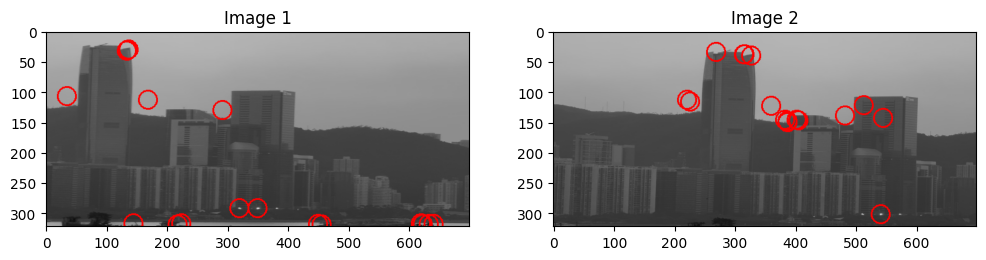

In [5]:
contrastThreshold = 0.04
nfeatures = 25

sift = cv.SIFT_create(nfeatures=nfeatures, contrastThreshold=contrastThreshold)

img1_kp = keypoint_generate(sift, img1)
    
img2_kp = keypoint_generate(sift, img2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1_kp)
axes[0].set_title('Image 1')
axes[1].imshow(img2_kp)
axes[1].set_title('Image 2')
plt.show()

### Explanation

Accoring to [opencv documentation](https://docs.opencv.org/4.6.0/d7/d60/classcv_1_1SIFT.html), nfesture can limit the number of feastures detected. Thus setting this value can have a 20~ data points. With nfeature seted, there is no need to adjust the threshold.

# Task2

25
26
25
26
25
25


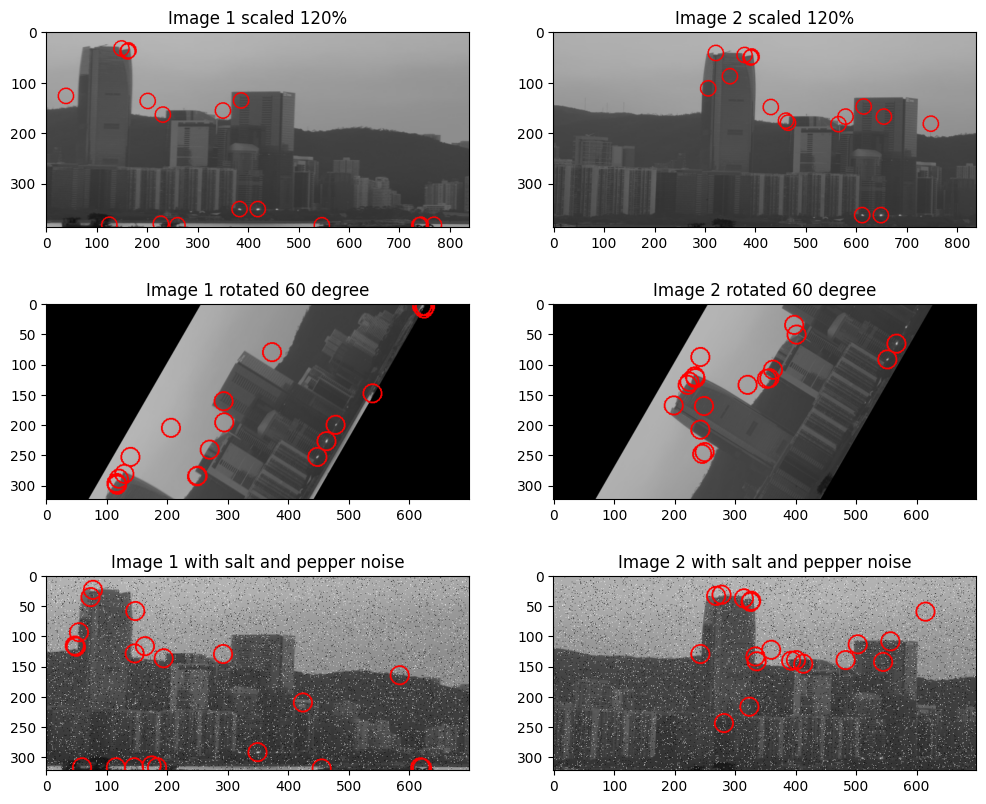

In [6]:
# Task 2.a scaled with 120 percent
scale_percent = 1.2
img1_scaled = cv.resize(img1, (int(img1.shape[1] * scale_percent), int(img1.shape[0] * scale_percent)), interpolation=cv.INTER_AREA)
img2_scaled = cv.resize(img2, (int(img2.shape[1] * scale_percent), int(img2.shape[0] * scale_percent)), interpolation=cv.INTER_AREA)

img1_scaled = keypoint_generate(sift, img1_scaled)
img2_scaled = keypoint_generate(sift, img2_scaled)

# Task 2.b roteate 60 degree clockwise
rotation_matrix = cv.getRotationMatrix2D((img1.shape[1]//2, img1.shape[0]//2), 60, 1)
img1_rotated = cv.warpAffine(img1, rotation_matrix, (img1.shape[1], img1.shape[0]))
img2_rotated = cv.warpAffine(img2, rotation_matrix, (img2.shape[1], img2.shape[0]))

img1_rotated = keypoint_generate(sift, img1_rotated)
img2_rotated = keypoint_generate(sift, img2_rotated)

# Task 2.c add salt and pepper noise
img1_noisy = (ski.util.random_noise(img1, mode='s&p', amount=0.05) * 255).astype(np.uint8)
img2_noisy = (ski.util.random_noise(img2, mode='s&p', amount=0.05) * 255).astype(np.uint8)


img1_noisy = keypoint_generate(sift, img1_noisy)
img2_noisy = keypoint_generate(sift, img2_noisy)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes[0][0].imshow(img1_scaled)
axes[0][0].set_title('Image 1 scaled 120%')
axes[0][1].imshow(img2_scaled)
axes[0][1].set_title('Image 2 scaled 120%')
axes[1][0].imshow(img1_rotated)
axes[1][0].set_title('Image 1 rotated 60 degree')
axes[1][1].imshow(img2_rotated)
axes[1][1].set_title('Image 2 rotated 60 degree')
axes[2][0].imshow(img1_noisy)
axes[2][0].set_title('Image 1 with salt and pepper noise')
axes[2][1].imshow(img2_noisy)
axes[2][1].set_title('Image 2 with salt and pepper noise')
plt.show()

### Explanation

These three images are all similar to the original image, details are as follows:

- With scaled 120%, feature of smaller objects of the image are less likely to be detected. This is due to reducing of contrast of small objects when reducing the image resolution, which will smooth the image.

- With rotation of 60 degrees, some features are lost due to the rotation, but the rest of the feature are similar to the original image.

- Salt and pepper noise has the opposite effect of scaling. The noise disrupts the large objects in the image, while the small objects not.

# Task3

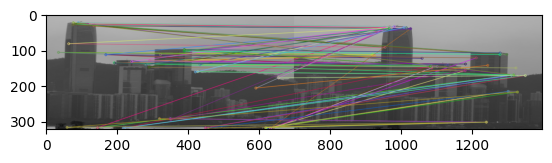

In [7]:
# Task 3.1 Brute Force Matching
sift = cv.SIFT_create(nfeatures=50)
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

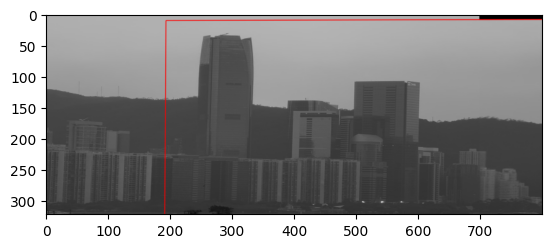

In [8]:
# Task 3.2 RANSAC
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
        
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)

h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

pts = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
dst = cv.perspectiveTransform(pts, H)

result = cv.warpPerspective(img1, H, (w1 + w2, h1))
result[0:h1, 0:w1] = img2

result = cv.cvtColor(result, cv.COLOR_GRAY2RGB)
result = cv.polylines(result, [np.int32(dst)], True, 255, 1, cv.LINE_AA)

result = result[:, :800]
plt.imshow(result)
plt.show()


### Reference  

https://docs.opencv.org/4.6.0/da/df5/tutorial_py_sift_intro.html  
https://docs.opencv.org/4.6.0/d7/d60/classcv_1_1SIFT.html  
https://docs.opencv.org/4.x/d0/d13/classcv_1_1Feature2D.html  
https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/  
https://scikit-image.org/docs/0.23.x/api/skimage.util.html#skimage.util.random_noise  
https://docs.opencv.org/4.6.0/dc/dc3/tutorial_py_matcher.html  
https://docs.opencv.org/4.x/d1/de0/tutorial_py_feature_homography.html  
https://www.geeksforgeeks.org/step-by-step-guide-to-using-ransac-in-opencv-using-python/  
https://www.geeksforgeeks.org/image-stitching-with-opencv/  


Copyright: This notebook is provided as part of the COMP9517 Computer Vision course at UNSW Sydney. This notebook can be used, modified and shared for educational purposes.

Borong Xu  
The Hong Kong University of Science and Technology  
Program of Computer Engineering  
https://boring180.github.io/